## We will be obtaining data, showcasing a package, and visualising the end result

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from urllib.request import urlopen

In [3]:
#from gensim import corpora, models
import nltk
import copy
import re

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RachnaGupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [6]:
url="https://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=game-of-thrones&episode=s01e01"
page = urlopen(url)

In [7]:
page

In [8]:
soup = BeautifulSoup((page), 'lxml')
type(soup)

bs4.BeautifulSoup

In [9]:
print(soup.title)

<title>Game of Thrones s01e01 Episode Script | SS</title>


In [10]:
script=soup.find('div', attrs={'scrolling-script-container'})
print(type(script))
#print(script)


<class 'bs4.element.Tag'>


In [11]:
script=BeautifulSoup(str(script), 'lxml').getText()
script.strip('\r\n\r\n\r\n                    \t\t\t')

'Easy, boy. What do you expect? They\'re savages. One lot steals a goat from another lot, before you know it they\'re ripping each other to pieces. I\'ve never seen wildlings do a thing like this. I never seen a thing like this, not ever in my life. How close did you get? - Close as any man would. - We should head back to the Wall. Do the dead frighten you? Our orders were to track the wildlings. We tracked them. They won\'t trouble us no more. You don\'t think he\'ll ask us how they died? Get back on your horse. Whatever did it to them could do it to us. They even killed the children. It\'s a good thing we\'re not children. You want to run away south, run away. Of course, they will behead you as a deserter. If I don\'t catch you first. Get back on your horse. I won\'t say it again. Your dead men seem to have moved camp. They were here. See where they went. What is it? It\'s Go on, Father\'s watching. And your mother. Fine work, as always. Well done. Thank you. I love the detail that y

## For loop to get all the scripts of all the episodes till season 6

Season 7 has 7 episodes, it is a bit inconsistant with rest of seasons where there were 10 episodes

## Let's analyze the link for first two episodes of first season

EP1: https://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=game-of-thrones&episode=s01e01

EP2: https://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=game-of-thrones&episode=s01e02

In [12]:
baseurl='https://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=game-of-thrones&episode='

In [13]:
s= ['s0'+ str(i) for i in range(1,7)]
print(s)

['s01', 's02', 's03', 's04', 's05', 's06']


In [14]:
e=['e0'+str(i) for i in range(1,10)]
# add e10 foe episode 10, instead of e010
e.append('e10')
print(e)

['e01', 'e02', 'e03', 'e04', 'e05', 'e06', 'e07', 'e08', 'e09', 'e10']


In [15]:
all_scripts=[]

for season in s[:]:
    for episode in e:
        url=baseurl+season+episode
        #print(url)
        page = urlopen(url)
        soup = BeautifulSoup((page), 'lxml')
        script=soup.find('div', attrs={'scrolling-script-container'})
        script=BeautifulSoup(str(script), 'lxml').getText()
        all_scripts.append(script.strip('\r\n\r\n\r\n                    \t\t\t'))

In [16]:
len(all_scripts)

60

In [17]:
df = pd.DataFrame(all_scripts)
df.head(10)

,0
0,"Easy, boy. What do you expect? They're savages..."
1,"You need to drink, child. And eat. lsn't there..."
2,"Welcome, Lord Stark. Grand Maester Pycelle has..."
3,The little lord's been dreaming again. - We ha...
4,Does Ser Hugh have any family in the capital? ...
5,"Your pardon, Your Grace. I would rise, but Do ..."
6,"""Summoned to court to answer for the crimes ""o..."
7,"Yah! Left high, left low. Right low, lunge rig..."
8,"You've seen better days, my lord. Another visi..."
9,Look at me. Look at me! Do you remember me now...


In [18]:
#df1=pd.DataFrame(df)
df1=copy.deepcopy(df)

In [19]:
df1.head()

,0
0,"Easy, boy. What do you expect? They're savages..."
1,"You need to drink, child. And eat. lsn't there..."
2,"Welcome, Lord Stark. Grand Maester Pycelle has..."
3,The little lord's been dreaming again. - We ha...
4,Does Ser Hugh have any family in the capital? ...


In [20]:
s

['s01', 's02', 's03', 's04', 's05', 's06']

In [21]:
e

['e01', 'e02', 'e03', 'e04', 'e05', 'e06', 'e07', 'e08', 'e09', 'e10']

In [22]:
l=[i+j for i in s for j in e]

In [23]:
df1['episodes']=l
df1['episodes'].head()

0    s01e01
1    s01e02
2    s01e03
3    s01e04
4    s01e05
Name: episodes, dtype: object

In [24]:
df1.head()

,0,episodes
0,"Easy, boy. What do you expect? They're savages...",s01e01
1,"You need to drink, child. And eat. lsn't there...",s01e02
2,"Welcome, Lord Stark. Grand Maester Pycelle has...",s01e03
3,The little lord's been dreaming again. - We ha...,s01e04
4,Does Ser Hugh have any family in the capital? ...,s01e05


In [25]:
#print(re.findall('\w+', df1[0].loc[0]))

In [26]:
def getNGrams(word_string, n=5):
    wordlist=re.findall('\w+', word_string)
    return [wordlist[i:i+n] for i in range(len(wordlist)-(n-1))]

In [27]:
wordstring = 'it was the best of times it was the worst of times '

In [28]:
print(getNGrams(wordstring, 7))

[['it', 'was', 'the', 'best', 'of', 'times', 'it'], ['was', 'the', 'best', 'of', 'times', 'it', 'was'], ['the', 'best', 'of', 'times', 'it', 'was', 'the'], ['best', 'of', 'times', 'it', 'was', 'the', 'worst'], ['of', 'times', 'it', 'was', 'the', 'worst', 'of'], ['times', 'it', 'was', 'the', 'worst', 'of', 'times']]


In [29]:
#d_str=df[0].iloc[0]
#print(type(d_str))
#print((d_str).split())

## Getting n-grams for s01e01

In [30]:
#print(getNGrams(df1[0].iloc[0], 5))

#### Making an N-Gram Dictionary

In [31]:
# Given a list of n-grams identify the index of the keyword.
def nGramsToKWICDict(ngrams):
    keyindex = len(ngrams[0]) // 2
    kwic_dict={}
    
    #check if middle word of n gram not in dict, add n gram to dict for middle element, 
    #if it exists then append the new n gram to the previous n gram
    for k in ngrams:
        #print(k)
        if k[keyindex].lower() not in kwic_dict:
            kwic_dict[k[keyindex].lower()] = [k]
        else:
            kwic_dict[k[keyindex].lower()].append(k)
    return kwic_dict

In [32]:
#print(wordstring.split())
ngrams=getNGrams(wordstring)

print('Position of keyword: ', nGramsToKWICDict(ngrams))

Position of keyword:  {'the': [['it', 'was', 'the', 'best', 'of'], ['it', 'was', 'the', 'worst', 'of']], 'best': [['was', 'the', 'best', 'of', 'times']], 'of': [['the', 'best', 'of', 'times', 'it']], 'times': [['best', 'of', 'times', 'it', 'was']], 'it': [['of', 'times', 'it', 'was', 'the']], 'was': [['times', 'it', 'was', 'the', 'worst']], 'worst': [['was', 'the', 'worst', 'of', 'times']]}


## Getting n grams dictionary for s01e01

In [33]:
ngrams=getNGrams(df1[0].iloc[0], 5)
word_dict = nGramsToKWICDict(ngrams)

print(word_dict['winter'])

[['forever', 'And', 'winter', 'is', 'coming'], ['the', 'King', 'Winter', 'is', 'coming']]


## Winter as Token for all episodes

In [34]:
for i in range(60):
    len_ngram=5
    
    ngrams=getNGrams(df1[0].iloc[i], len_ngram)
    word_dict = nGramsToKWICDict(ngrams)
    
    token='winter'
    
    if token in word_dict.keys():
        for v in word_dict[token]:
            
            print('Ep: {0} {1} | {2} | {3}'.format(df1['episodes'].iloc[i], 
                                                   ' '.join(v[:len(v)//2]).rjust(10*len_ngram//2), 
                                                   v[len(v)//2].center(len(token)+6), 
                                                   ' '.join(v[len(v)//2+1:])))

Ep: s01e01               forever And |    winter    | is coming
Ep: s01e01                  the King |    Winter    | is coming
Ep: s01e03                  the king |    Winter    | may be
Ep: s01e03                  when the |    winter    | comes the
Ep: s01e03                 our words |    Winter    | is coming
Ep: s01e03                   But now |    winter    | is truly
Ep: s01e03                    in the |    winter    | we must
Ep: s01e03                   for the |    winter    | when the
Ep: s01e04                  the last |    winter    | How long
Ep: s01e04                  the last |    winter    | It was
Ep: s01e04                  come the |    winter    | you will
Ep: s01e10                  Wall And |    winter    | is coming
Ep: s02e01               even longer |    winter    | A common
Ep: s02e01                 five year |    winter    | If it
Ep: s02e01                  And with |    winter    | coming it
Ep: s02e01                 stand the |    winter    | The

## All houses as token

In [35]:
tokens=['targaryens', 'lannisters', 'baratheon', 'tyrell', 'martell', 'arryn']
for token in tokens:
    for i in range(60):
        len_ngram=5
        ngrams=getNGrams(df1[0].iloc[i], len_ngram)
        word_dict = nGramsToKWICDict(ngrams)

        #token='targaryens'

        if token in word_dict.keys():
            for v in word_dict[token]:

                print('Ep: {0} {1} | {2} | {3}'.format(df1['episodes'].iloc[i], 
                                                       ' '.join(v[:len(v)//2]).rjust(10*len_ngram//2), 
                                                       v[len(v)//2].center(len(token)+6), 
                                                       ' '.join(v[len(v)//2+1:])))

Ep: s01e01                 Grace The |    Targaryens    | are gone
Ep: s01e05                    to the |    Targaryens    | Mormont You
Ep: s01e07                    as the |    Targaryens    | did I
Ep: s01e07                 lover The |    Targaryens    | wed brothers
Ep: s02e01                 about the |    Targaryens    | they were
Ep: s02e05                Before the |    Targaryens    | defeated the
Ep: s02e07                people The |    Targaryens    | I only
Ep: s02e07                  Sins The |    Targaryens    | Wed brother
Ep: s02e07                  Half the |    Targaryens    | went mad
Ep: s02e09                    50 The |    Targaryens    | built this
Ep: s03e04                  the last |    Targaryens    | are buried
Ep: s03e05                    to the |    Targaryens    | You bring
Ep: s03e05                   And the |    Targaryens    | built this
Ep: s05e04                before the |    Targaryens    | the Faith
Ep: s05e06               against the |    Ta

Ep: s05e08               against the |    Lannisters    | I killed
Ep: s05e09                  with the |    Lannisters    | And that
Ep: s05e10                    be The |    Lannisters    | and the
Ep: s06e06                 them what |    Lannisters    | are what
Ep: s06e08               against the |    Lannisters    | and the
Ep: s06e08                   and the |    Lannisters    | I thought
Ep: s06e10                   and the |    Lannisters    | send their
Ep: s06e10                  fear the |    Lannisters    | We gave
Ep: s06e10                 speak The |    Lannisters    | have declared
Ep: s06e10                  Rock the |    Lannisters    | will have
Ep: s01e01                 the House |    Baratheon    | the first
Ep: s01e02               with Robert |    Baratheon    | You came
Ep: s01e06                 the House |    Baratheon    | the First
Ep: s01e06                 Lord Orys |    Baratheon    | black of
Ep: s01e06                 hair Axel |    Baratheon    | b

Ep: s02e06                does House |    Tyrell    | rebelled against
Ep: s02e06             agreement The |    Tyrell    | host has
Ep: s02e10             Lannister and |    Tyrell    | I declare
Ep: s02e10                 Ser Loras |    Tyrell    | Your house
Ep: s03e01                 Ser Loras |    Tyrell    | I will
Ep: s03e01                glad House |    Tyrell    | has been
Ep: s03e02                like Loras |    Tyrell    | You re
Ep: s03e02                    like a |    Tyrell    | rose Give
Ep: s03e02              had Margaery |    Tyrell    | dotes on
Ep: s03e02                 Ser Loras |    Tyrell    | my lady
Ep: s03e02                  of House |    Tyrell    | Kiss me
Ep: s03e02                    when a |    Tyrell    | farts it
Ep: s03e02               people Lady |    Tyrell    | my king
Ep: s03e05                that House |    Tyrell    | do not
Ep: s03e05           infantrymen the |    Tyrell    | family has
Ep: s03e05                that House |    Tyrell  

Ep: s06e04                  to House |    Arryn    | To your


In [36]:
for i in range(60):
    len_ngram=5
    
    ngrams=getNGrams(df1[0].iloc[i], len_ngram)
    word_dict = nGramsToKWICDict(ngrams)
    
    token='nymeria'
    
    if token in word_dict.keys():
        for v in word_dict[token]:
            
            print('Ep: {0} {1} | {2} | {3}'.format(df1['episodes'].iloc[i], 
                                                   ' '.join(v[:len(v)//2]).rjust(10*len_ngram//2), 
                                                   v[len(v)//2].center(len(token)+6), 
                                                   ' '.join(v[len(v)//2+1:])))

Ep: s01e02                 Thank you |    Nymeria    | Septa Mordane
Ep: s01e02                help Watch |    Nymeria    | gloves lmpressive
Ep: s01e02                   Shut up |    Nymeria    | gloves l
Ep: s01e02                 cunt Arya |    Nymeria    | Arya Nymeria
Ep: s01e02              Nymeria Arya |    Nymeria    | No No


## sentence as token

In [37]:
#print((df[0].loc[0]))
str_=re.findall('\w+', df[0].loc[0])
#print(str_)
nltk.sent_tokenize(df[0].loc[0])

['Easy, boy.',
 'What do you expect?',
 "They're savages.",
 "One lot steals a goat from another lot, before you know it they're ripping each other to pieces.",
 "I've never seen wildlings do a thing like this.",
 'I never seen a thing like this, not ever in my life.',
 'How close did you get?',
 '- Close as any man would.',
 '- We should head back to the Wall.',
 'Do the dead frighten you?',
 'Our orders were to track the wildlings.',
 'We tracked them.',
 "They won't trouble us no more.",
 "You don't think he'll ask us how they died?",
 'Get back on your horse.',
 'Whatever did it to them could do it to us.',
 'They even killed the children.',
 "It's a good thing we're not children.",
 'You want to run away south, run away.',
 'Of course, they will behead you as a deserter.',
 "If I don't catch you first.",
 'Get back on your horse.',
 "I won't say it again.",
 'Your dead men seem to have moved camp.',
 'They were here.',
 'See where they went.',
 'What is it?',
 "It's Go on, Father'

In [38]:
def getNGrams_sent(word_string, n=5):
    wordlist=re.findall('\w+', word_string)
    return [wordlist[i:i+n] for i in range(len(wordlist)-(n-1))]

In [39]:
# Given a list of n-grams identify the index of the keyword.
def nGramsToKWICDict_sent(ngrams):
    keyindex = (len(ngrams[0]) // 2)-1
    kwic_dict={}
    
    #k=ngrams[keyindex:keyindex+2]
    #print('ngrams', ngrams)
    for k in ngrams:
        #print('k:', k)
        find_key=k[keyindex:keyindex+2]
        #print(keyindex, '::', find_key)
        if ' '.join(find_key).lower() not in kwic_dict:
            kwic_dict[' '.join(find_key).lower()]=[k]
        else:
            kwic_dict[' '.join(find_key).lower()].append(k)
    #print(kwic_dict.keys())
    return kwic_dict

In [40]:
for i in range(60):
    len_ngram=6
    
    ngrams=getNGrams_sent(df1[0].iloc[i], len_ngram)
    #print(ngrams)
    word_dict = nGramsToKWICDict_sent(ngrams)
    #print(word_dict)
    token='always pays'
    
    if token in word_dict.keys():
        for v in word_dict[token]:
            
            print('Ep: {0} {1} | {2} | {3}'.format(df1['episodes'].iloc[i], 
                                                   ' '.join(v[:len(v)//2]).rjust(10*len_ngram//2), 
                                                   v[len(v)//2].center(len(token)+6), 
                                                   ' '.join(v[len(v)//2+1:])))

Ep: s01e05             a Lannister always |        pays       | his debts
Ep: s01e05             A Lannister always |        pays       | his debts
Ep: s01e06             a Lannister always |        pays       | his debts
Ep: s01e06             A Lannister always |        pays       | his debts
Ep: s02e08             a Lannister always |        pays       | her debts
Ep: s04e07             A Lannister always |        pays       | his debts


# Let's create a word cloud of season 1 episode 1

We will remove stopwords from the episode transcript.

In [54]:
s01e01=df1[0][0]

In [97]:
stop_words=set(stopwords.words('english'))
stop_words.update(['us', 'want', 'done', 'see', 'come', 'go', 'still', 'yes', 'ask', 'get', 'let', 'call', 'one', 'say','thing', 'Easy', 'lot', ''])

In [98]:
#reg=nltk.tokenize.RegexpTokenizer('\w+')
s01e01_list=re.findall('\w+', s01e01)
s01e01_list[:10]

['Easy', 'boy', 'What', 'do', 'you', 'expect', 'They', 're', 'savages', 'One']

In [99]:
#s01e01_list=nltk.tokenize.word_tokenize(s01e01)
#s01e01_list[:10]
stop_words

{'',
 'Easy',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'ask',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'call',
 'can',
 'come',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'get',
 'go',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'let',
 'll',
 'lot',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one

In [100]:
word_cloud=[w for w in s01e01_list if w.lower() not in stop_words]
word_cloud

['Easy',
 'boy',
 'expect',
 'savages',
 'steals',
 'goat',
 'another',
 'know',
 'ripping',
 'pieces',
 'never',
 'seen',
 'wildlings',
 'like',
 'never',
 'seen',
 'like',
 'ever',
 'life',
 'close',
 'Close',
 'man',
 'would',
 'head',
 'back',
 'Wall',
 'dead',
 'frighten',
 'orders',
 'track',
 'wildlings',
 'tracked',
 'trouble',
 'think',
 'died',
 'back',
 'horse',
 'Whatever',
 'could',
 'even',
 'killed',
 'children',
 'good',
 'children',
 'run',
 'away',
 'south',
 'run',
 'away',
 'course',
 'behead',
 'deserter',
 'catch',
 'first',
 'back',
 'horse',
 'dead',
 'men',
 'seem',
 'moved',
 'camp',
 'went',
 'Father',
 'watching',
 'mother',
 'Fine',
 'work',
 'always',
 'Well',
 'Thank',
 'love',
 'detail',
 'managed',
 'corners',
 'Quite',
 'beautiful',
 'stitching',
 'Oh',
 'stitch',
 'beautiful',
 'Thank',
 'marksman',
 'ten',
 'Keep',
 'practicing',
 'Bran',
 'think',
 'much',
 'Bran',
 'Relax',
 'bow',
 'arm',
 'Quick',
 'Bran',
 'Faster',
 'Lord',
 'Stark',
 'lady',
 

In [101]:
text=' '.join(word_cloud)

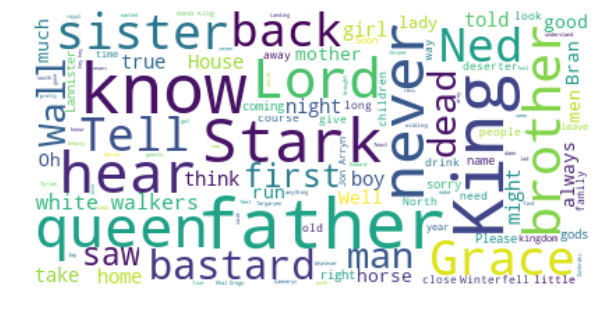

In [102]:
wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white").generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [148]:
mask = np.array(Image.open('Game-of-Thrones-stark-Images.jpg'))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [149]:
def transform_format(val):
    if val ==100:
        return 255
    else:
        #val=0
        return val

In [150]:
transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [151]:
transformed_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

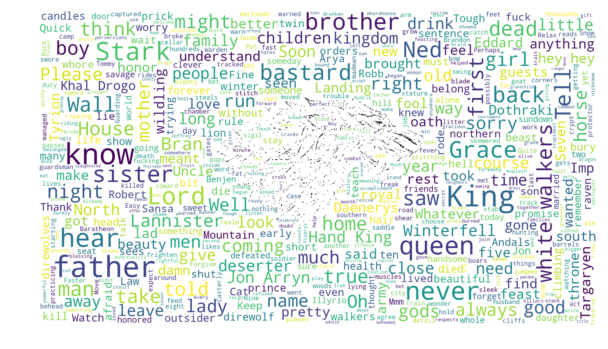

In [152]:
wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white", 
                      mask=transformed_mask, contour_width=3, contour_color='black').generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("img/got2.png", format="png")

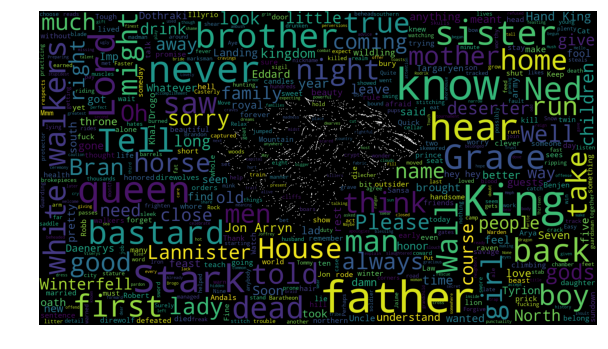

In [154]:
wordcloud = WordCloud(max_font_size=150, max_words=900, 
                      mask=transformed_mask, contour_width=3, contour_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="hermite")
plt.axis("off")
plt.show()
plt.savefig("img/got.png", format="png")